# Convolutional Neural Network

### Importing the libraries

In [50]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [51]:
tf.__version__

'2.15.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [52]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


### Preprocessing the Validation set

In [53]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_set = validation_datagen.flow_from_directory('val',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 16 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [54]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [55]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [56]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [57]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [58]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [59]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [60]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [61]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [62]:
EPOCH_SIZE = 5 #change this to 25 for better accuracy, using 5 for speed

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")
cnn.fit(x = training_set, validation_data = validation_set, epochs = EPOCH_SIZE, callbacks=[tensorboard_callback])

Epoch 1/5


163/163 [==============================] - 65s 390ms/step - loss: 0.3544 - accuracy: 0.8449 - val_loss: 0.2930 - val_accuracy: 0.9375
Epoch 2/5
163/163 [==============================] - 55s 334ms/step - loss: 0.2254 - accuracy: 0.9043 - val_loss: 0.2589 - val_accuracy: 0.8750
Epoch 3/5
163/163 [==============================] - 49s 298ms/step - loss: 0.1971 - accuracy: 0.9210 - val_loss: 0.2416 - val_accuracy: 1.0000
Epoch 4/5
163/163 [==============================] - 50s 305ms/step - loss: 0.2008 - accuracy: 0.9187 - val_loss: 0.4567 - val_accuracy: 0.7500
Epoch 5/5
163/163 [==============================] - 48s 292ms/step - loss: 0.1686 - accuracy: 0.9321 - val_loss: 1.1080 - val_accuracy: 0.6250


### Visualizing Loss

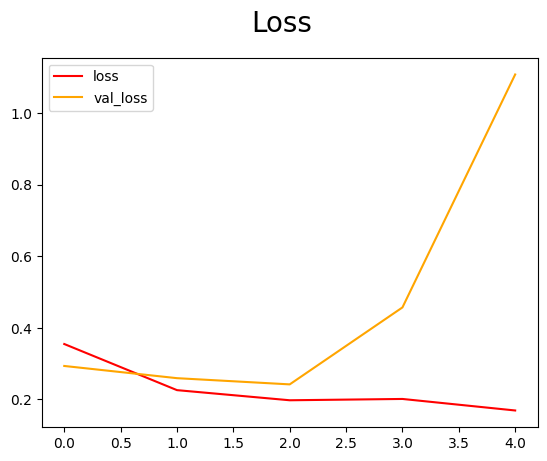

In [63]:
from matplotlib import pyplot as plt

fig = plt.figure()
plt.plot(cnn.history.history['loss'], color='red', label='loss')
plt.plot(cnn.history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Part 4 - Making predictions

In [64]:
import os
import numpy as np
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from keras.preprocessing import image
import random

PNEUMONIA_PREDICTION_THRESHOLD = 0.5

def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    prediction = model.predict(img_tensor)
    return 'Pneumonia' if prediction[0][0] > PNEUMONIA_PREDICTION_THRESHOLD else 'Normal'

normal_dir = 'test/NORMAL'
pneumonia_dir = 'test/PNEUMONIA'

normal_files = [os.path.join(normal_dir, f) for f in os.listdir(normal_dir)]
pneumonia_files = [os.path.join(pneumonia_dir, f) for f in os.listdir(pneumonia_dir)]

all_files = normal_files + pneumonia_files
random.shuffle(all_files)

y_true = []
y_pred = []
for f in all_files:
    prediction = predict_image(cnn, f)
    print(f'Prediction for {os.path.basename(f)}: {prediction}\n')
    y_pred.append(prediction)
    if 'NORMAL' in f:
        y_true.append('Normal')
    else:
        y_true.append('Pneumonia')

f1 = f1_score(y_true, y_pred, pos_label='Pneumonia')
recall = recall_score(y_true, y_pred, pos_label='Pneumonia')
precision = precision_score(y_true, y_pred, pos_label='Pneumonia')
accuracy = accuracy_score(y_true, y_pred)

print(f'F1 score: {f1:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Accuracy: {accuracy:.2f}')


1/1 [==============================] - 0s 104ms/step
Prediction for person85_bacteria_421.jpeg: Pneumonia

1/1 [==============================] - 0s 29ms/step
Prediction for IM-0010-0001.jpeg: Normal

1/1 [==============================] - 0s 27ms/step
Prediction for IM-0084-0001.jpeg: Normal

1/1 [==============================] - 0s 29ms/step
Prediction for person158_bacteria_743.jpeg: Pneumonia

1/1 [==============================] - 0s 28ms/step
Prediction for person140_bacteria_667.jpeg: Pneumonia

1/1 [==============================] - 0s 37ms/step
Prediction for person83_bacteria_414.jpeg: Pneumonia

1/1 [==============================] - 0s 34ms/step
Prediction for person149_bacteria_713.jpeg: Pneumonia

1/1 [==============================] - 0s 31ms/step
Prediction for person81_bacteria_398.jpeg: Pneumonia

1/1 [==============================] - 0s 53ms/step
Prediction for person52_virus_106.jpeg: Pneumonia

1/1 [==============================] - 0s 41ms/step
Prediction for pe